# Comparison of Walmart Data, CPI Data, and Unemployment Claims Data

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [62]:
# sales = name of main dataframe AFTER it has been cleaned up & merged
# cpi = inflation table
# joblessclaims = unemployment table
# train = unfiltered Walmart Sales Data

In [63]:
# Read cpi.csv
CPIColNames = ['Date', 'CPI']
cpiRaw = pd.read_csv('cpi.csv', parse_dates=['Date'], header=None, index_col = 0, names=CPIColNames)


# Read Jobless Claims Data csv
JobColNames = ['Date', 'Claims']
joblessclaims = pd.read_csv('initial_joblessclaims.csv', parse_dates=True, index_col = 0, header = None, names=JobColNames)


# Read the Walmart Sales Data csv
train = pd.read_csv('train.csv')



In [64]:
# Slice out the selected CPI months from February 2010 through October 2012
cpi = cpiRaw.loc['Feb-10':'Oct-12', :]
cpi.reset_index(inplace=True)

# Slice only the Jobless Claims dates from from February 2010 through October 2012
JoblessClaims = joblessclaims.loc['06/2/2010':'27/10/2012', :]
JoblessClaims = pd.DataFrame(JoblessClaims)


# Change all data types to Datetime and Float 

In [65]:
# Slice out store one's information 
train_subset = train[:14019]

In [73]:
# Convert to JoblessClaims DateTime
JoblessClaims.reset_index(inplace=True)
JoblessClaims['Date'] = pd.to_datetime(JoblessClaims['Date'],dayfirst=True)

# Convert train to Datetime
train_subset["datetime_Date"] = pd.to_datetime(train_subset.Date)


# Convert cpi to Datetime
cpi["cpi_date"] = pd.to_datetime(cpi.Date, format="%b-%y")

C:\Users\Bonew\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Bonew\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [74]:
# Check JoblessClaims data types
JoblessClaims.dtypes

index                 int64
Date         datetime64[ns]
Claims               object
Date_sub1    datetime64[ns]
dtype: object

In [75]:
# Check cpi data types
cpi.dtypes

Date                object
CPI                 object
cpi_date    datetime64[ns]
dtype: object

In [76]:
# Check train data types
train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [77]:
# Confirm we have the right datetime data type
train_subset.dtypes

Store                     int64
Dept                      int64
Date                     object
Weekly_Sales            float64
IsHoliday                  bool
datetime_Date    datetime64[ns]
dtype: object

In [89]:
# Format Jobless Claims dates to match train Dataframe
JoblessClaims.Date + dt.timedelta(days=-1)
JoblessClaims["Date_sub1"] = JoblessClaims.Date + dt.timedelta(days=-1)
JoblessClaims["jobless_date"] = JoblessClaims.apply(lambda x: x["Date_sub1"].replace(day=1),axis=1)

In [91]:
# Add a column that formats date so we can merge the three dataframes
train_subset['train_date'] = train_subset.apply(lambda x: x["datetime_Date"].replace(day=1),axis=1)
train_subset.head()

C:\Users\Bonew\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Store,Dept,Date,Weekly_Sales,IsHoliday,datetime_Date,train_date
0,1,1,2/5/2010,24924.50,False,2010-02-05,2010-02-01
1,1,1,2/12/2010,46039.49,True,2010-02-12,2010-02-01
2,1,1,2/19/2010,41595.55,False,2010-02-19,2010-02-01
3,1,1,2/26/2010,19403.54,False,2010-02-26,2010-02-01
4,1,1,3/5/2010,21827.90,False,2010-03-05,2010-03-01


# Combine the three Dataframes

In [93]:
# Merge train_subset with cpi Dataframes
merge1 = pd.merge(train_subset, cpi, how='inner', on=None, left_on='train_date', right_on='cpi_date',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)


In [94]:
# Merge merge1 with JoblessCLaims Dataframes
merge2 = pd.merge(merge1, JoblessClaims, how='left', on=None, left_on='datetime_Date', right_on='Date_sub1',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
merge2.head()

,Store,Dept,Date_x,Weekly_Sales,IsHoliday,datetime_Date,train_date,Date_y,CPI,cpi_date,index,Date,Claims,Date_sub1,jobless_date
0,1,1,2/5/2010,24924.50,False,2010-02-05,2010-02-01,Feb-10,173.419,2010-02-01,0,2010-02-06,512.463,2010-02-05,2010-02-01
1,1,2,2/5/2010,50605.27,False,2010-02-05,2010-02-01,Feb-10,173.419,2010-02-01,0,2010-02-06,512.463,2010-02-05,2010-02-01
2,1,3,2/5/2010,13740.12,False,2010-02-05,2010-02-01,Feb-10,173.419,2010-02-01,0,2010-02-06,512.463,2010-02-05,2010-02-01
3,1,4,2/5/2010,39954.04,False,2010-02-05,2010-02-01,Feb-10,173.419,2010-02-01,0,2010-02-06,512.463,2010-02-05,2010-02-01
4,1,5,2/5/2010,32229.38,False,2010-02-05,2010-02-01,Feb-10,173.419,2010-02-01,0,2010-02-06,512.463,2010-02-05,2010-02-01


In [96]:
# Clean up and rename the second merged table
cleanDf = merge2.drop(columns=['Date_x', 'train_date', 'Date_y', 'cpi_date', 'Date', 'Date_sub1', 'jobless_date'])
cleanDf.head()

,Store,Dept,Weekly_Sales,IsHoliday,datetime_Date,CPI,index,Claims
0,1,1,24924.50,False,2010-02-05,173.419,0,512.463
1,1,2,50605.27,False,2010-02-05,173.419,0,512.463
2,1,3,13740.12,False,2010-02-05,173.419,0,512.463
3,1,4,39954.04,False,2010-02-05,173.419,0,512.463
4,1,5,32229.38,False,2010-02-05,173.419,0,512.463


In [97]:
# Slice out store one's information
store1 = cleanDf.iloc[1:13993, :]
store1.head()

,Store,Dept,Weekly_Sales,IsHoliday,datetime_Date,CPI,index,Claims
1,1,2,50605.27,False,2010-02-05,173.419,0,512.463
2,1,3,13740.12,False,2010-02-05,173.419,0,512.463
3,1,4,39954.04,False,2010-02-05,173.419,0,512.463
4,1,5,32229.38,False,2010-02-05,173.419,0,512.463
5,1,6,5749.03,False,2010-02-05,173.419,0,512.463


# Visualize the Data

In [55]:
cpi.plt.plot(kind = scatter)
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 100), ylim=(0, 2),
       xlabel='cpi_date', ylabel='CPI',
       title='A Simple Plot')

AttributeError: 'DataFrame' object has no attribute 'plt'

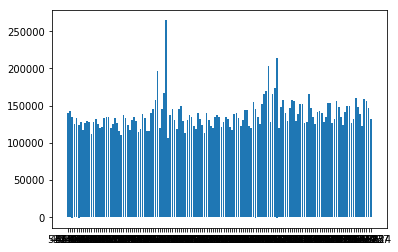

In [28]:
plt.bar(store1['Claims'], store1['Weekly_Sales'])
plt.show()

ValueError: setting an array element with a sequence.

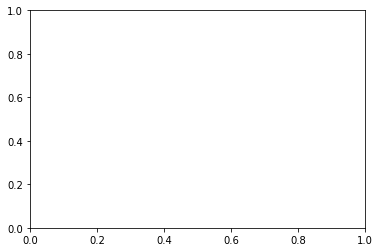

In [255]:
store1 = cleanDf.iloc[0:14046, 1:3]
#Store1Sales= store1['Weekly_Sales'].mean()
store1 = store1.groupby('Dept')
plt.bar(store1['Dept'], store1['Weekly_Sales'])


In [ ]:
#plt.bar(cleanDf['Store'], cleanDf['Weekly_Sales'])
#cleanDf.iloc[14046]
plt.show()

In [ ]:
cleanDf.columns

In [ ]:
# cleanDf = merge2['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'datetime_Date', 'CPI', 'Claims']
# cleanDf.head()

In [ ]:
merge2.describe()
merge2.shape

In [ ]:
#merge2['first_of_month'] = merge2.groupby([merge2['cpi_datetime_parsed'], ['jobless_firstofmonth'], ['train_date']]).mean()
#####merge2['DDate'] = merge2['cpi_datetime_parsed'].groupby(merge2['jobless_firstofmonth']) -> THIS RUNS
#sales.groupby('cpi_datetime_parsed')['jobless_firstofmonth'].apply(list)
# sales = merge2.groupby([merge2['cpi_datetime_parsed', 'jobless_firstofmonth', 'train_date'])
#sales.head()
#type(merge2)


In [ ]:
new = pd.concat([cpi, JoblessClaims, train_subset], axis=0, sort=True)

In [ ]:
new.head()

In [ ]:
new = new.dropna()
print(new)

In [ ]:
JobColNames = ['Date', 'Claims']
joblessclaims = pd.read_csv('initial_joblessclaims.csv', parse_dates=True, index_col = 0, header = None, names=JobColNames)

#Slice only the dates from the list
JoblessClaims = joblessclaims.loc['6/2/2010':'27/10/2012', :]

# Convert to DateTime
#JoblessClaims = pd.to_datetime(joblessclaims['Unnamed: 0'], format='%d%m%y')

In [ ]:
df11 = cpi.set_index(['Date','CPI'])
df22 = joblessclaims.set_index(['Date','Claims'])

df = df11.combine_first(df22).astype(int).reset_index()

In [ ]:
    #joblessclaims.columns = ['Date', 'Jobless Claims']
#joblessclaims = np.array(joblessclaims)


In [ ]:
# # setup the dataframe
# cpi = pd.read_csv("initial_joblessclaims.csv", na_values=["0"],
#                 parse_dates=['Date'])
# df.to_csv('new.csv', index=True, columns=fields)

# dt = pd.date_range("08-11-2014","08-27-2014", index=True)
# #idx = pd.DatetimeIndex(dt, index=True)

In [ ]:
cpi.append["Column"]

In [ ]:
# Use for loop to search for the month to correspond to dates in "train" and "joblesssclaims".  